# CIFAR 10

We try to implement a Resnet 34 model for with the best parameter settings as mentioned in their respective paper and try to implement our own version of algorithm

In [1]:
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np

LABELS = ['SGD','ADAGRAD','ADAM','AMSBOUND','ADABOUND','AMSGRAD','GGDO4','GGDO2']

In [2]:
def get_folder_path(use_pretrained=True):
    path = 'curve/trained2'
    if use_pretrained:
        path = os.path.join(path, 'pretrained')
    return path

In [3]:
def get_curve_data(use_pretrained=True, model='ResNet'):
    folder_path = get_folder_path(use_pretrained)
    filenames = [name for name in os.listdir(folder_path) if name.startswith(model.lower())]
    paths = [os.path.join(folder_path, name) for name in filenames]
    keys = [name.split('-')[1] for name in filenames]
    return {key: torch.load(fp) for key, fp in zip(keys, paths)}

In [4]:
def plot(use_pretrained=True, model='ResNet', optimizers=None, curve_type='train', plot_acc=True):
    assert model in ['ResNet', 'DenseNet'], 'Invalid model name: {}'.format(model)
    assert curve_type in ['train', 'test'], 'Invalid curve type: {}'.format(curve_type)
    assert all(_ in LABELS for _ in optimizers), 'Invalid optimizer'
    
    curve_data = get_curve_data(use_pretrained, model=model)
    
    if plot_acc==True:
        plt.figure(figsize=(10,6))
        plt.title('{} Accuracy for {} on CIFAR-10'.format(curve_type.capitalize(), model))
        plt.xlabel('Epoch')
        plt.ylabel('{} Accuracy %'.format(curve_type.capitalize()))
    
        plt.ylim(80, 101 if curve_type == 'train' else 96)
        plt_acc = 'acc'
        for optim in optimizers:
            linestyle = '--' if 'GGDO' in optim else '-'
            accuracies = np.array(curve_data[optim.lower()]['{}_{}'.format(curve_type,plt_acc)])
            plt.plot(accuracies, label=optim, ls=linestyle)
    
    else:
        plt.figure()
        plt.title('{} Categorical Cross Entropy Loss for {} on CIFAR-10'.format(curve_type.capitalize(), model))
        plt.xlabel('Epoch')
        plt.ylabel('{} Loss'.format(curve_type.capitalize()))
    
        plt_acc = 'loss'
        for optim in optimizers:
            linestyle = '--' if 'GGDO' in optim else '-'
            accuracies = np.array(curve_data[optim.lower()]['{}_{}'.format(curve_type,plt_acc)])
            plt.plot(accuracies, label=optim, ls=linestyle)
    
        
    plt.grid(ls='--')
    plt.legend()
    plt.show()

The above function is for plotting the learning curves. To use your own data points, set `use_pretrained` as `False`.

## ResNet

First, let's see the results with ResNet-34.

<IPython.core.display.Javascript object>


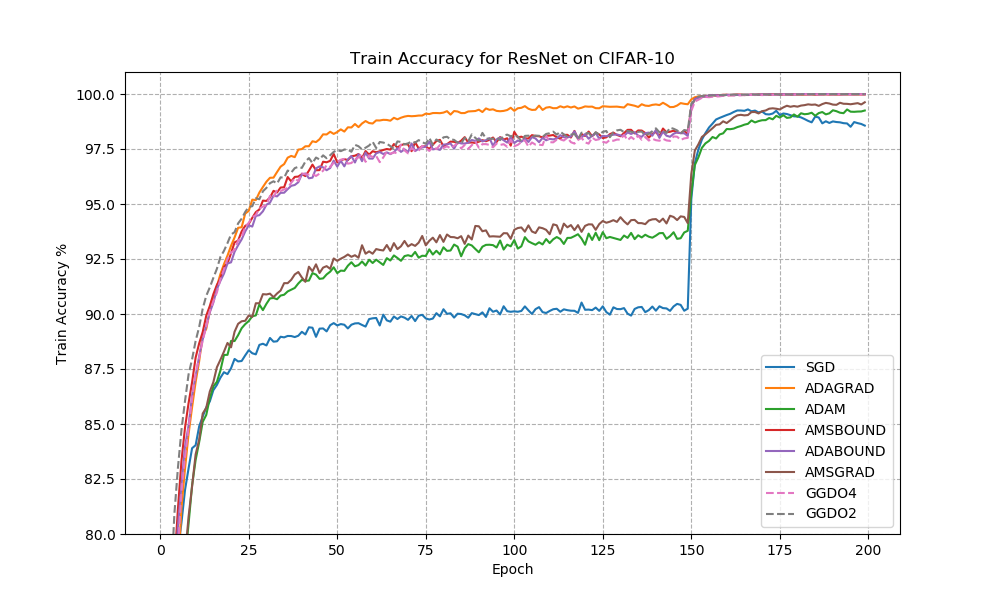

<IPython.core.display.Javascript object>


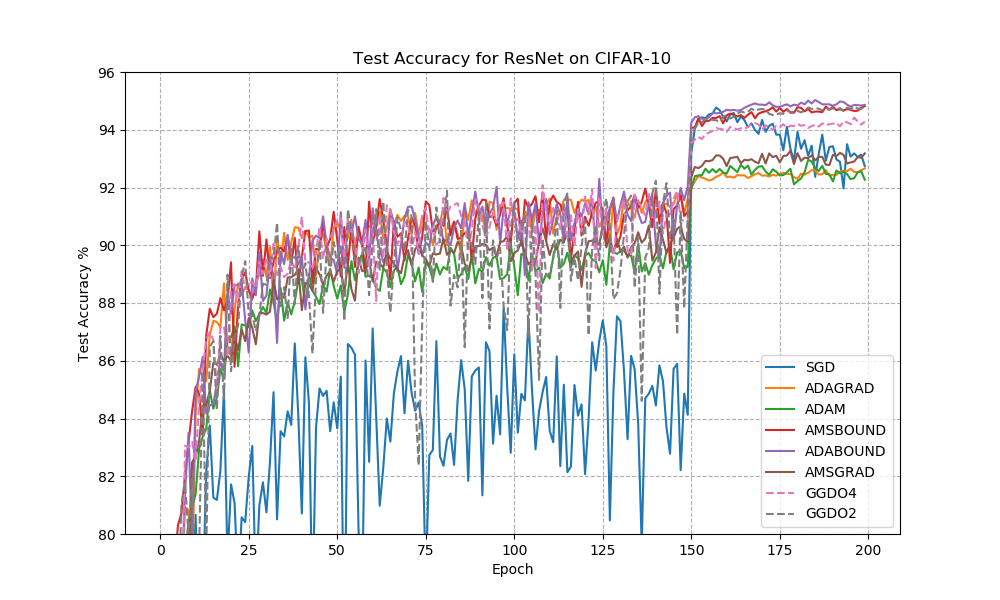

In [5]:
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='train',plot_acc=True)
plot(use_pretrained=False, model='ResNet', optimizers=LABELS, curve_type='test',plot_acc=True)

We see that even though the Adaptive methods outperform faster in the in-sample, in outsample they lose out to SGD and variant of GGDO.

GGDO performs in better in the earlier stages before the weight decay, and still performs as well as other adaptive methods such as ADAM and ADAGrad .
GGDO performs overall better than SGD and seems to have a better performance before weight decay, and further has almost simmilar performanc even after the weight decay.

In [6]:
# For DenseNet
#plot(use_pretrained=True, model='DenseNet', optimizers=LABELS, curve_type='train')
#plot(use_pretrained=True, model='DenseNet', optimizers=LABELS, curve_type='test')